#Exploração dos dados
Nesse tópico vamos explorar a base de dados "base_seguros.csv" e analisar suas Características.

Importação do pandas.

In [298]:
import pandas as  pd

Leitura do dataset.

In [299]:
ds = pd.read_csv('base_seguros.csv')

ds.head()

,idade,genero,imc,filhos,fumante,regiao,valor
0,56,Masculino,32.70,1.0,Sim,Nordeste,16356.12
1,46,Masculino,32.43,0.0,Não,Sul,11625.61
2,32,Masculino,23.02,0.0,Não,Nordeste,10697.76
3,60,Masculino,32.03,2.0,Sim,Norte,14075.76
4,25,Feminino,29.92,2.0,Sim,Norte,13542.01


Código utilizado para que funcione py2 e 3

In [300]:
import numpy as np
np.random.seed(42)
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

Conhecendo os dados da base "base_seguros.csv"

Utilizando o atributo do Pandas: "shape", podemos verificar quantas linhas e colunas nosso dataset possui.

In [301]:
ds.shape

(2000, 7)

In [302]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    2000 non-null   int64  
 1   genero   2000 non-null   object 
 2   imc      2000 non-null   float64
 3   filhos   1794 non-null   float64
 4   fumante  2000 non-null   object 
 5   regiao   2000 non-null   object 
 6   valor    2000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


Nessa analise podemos identificar que a coluna "filhos" possui dados nulos. No tópico de "Pré-processamento" vamos tratar esses casos.

Também podemos verificar que nossa base possui 3 colunas que são do tipo texto. Vamos analisar o conteúdo de cada uma:

In [303]:
set(ds["genero"])

{'Feminino', 'Masculino'}

In [304]:
ds["genero"].value_counts()

,count
genero,
Feminino,1014
Masculino,986


In [305]:
set(ds["fumante"])

{'Não', 'Sim'}

In [306]:
ds["fumante"].value_counts()

,count
fumante,
Sim,1030
Não,970


In [307]:
set(ds["regiao"])

{'Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'}

In [308]:
ds["regiao"].value_counts()

,count
regiao,
Norte,406
Sudeste,406
Centro-Oeste,404
Sul,400
Nordeste,384


Como a coluna fumante é em texto, porém a variação dos dados está somente em "Sim" e "Não", iremos converter para um valor binário. 1 e 0

In [309]:
ds['fumante'] = ds['fumante'].map({'Sim': 1, 'Não': 0})

In [310]:
ds.describe()

,idade,imc,filhos,fumante,valor
count,2000.00000,2000.000000,1794.000000,2000.0000,2000.000000
mean,41.31650,26.585845,1.983278,0.5150,11320.852105
std,13.46566,4.830634,1.413326,0.4999,1870.486722
min,18.00000,18.000000,0.000000,0.0000,6020.750000
25%,30.00000,22.920000,1.000000,0.0000,10007.740000
50%,42.00000,26.085000,2.000000,1.0000,11186.220000
75%,53.00000,29.590000,3.000000,1.0000,12478.725000
max,64.00000,42.860000,4.000000,1.0000,18909.510000


Após entendermos os dados existentes na base, vamos plotar um histograma para entender a distribuição dos dados:

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'fumante'}>],
       [<Axes: title={'center': 'valor'}>, <Axes: >]], dtype=object)

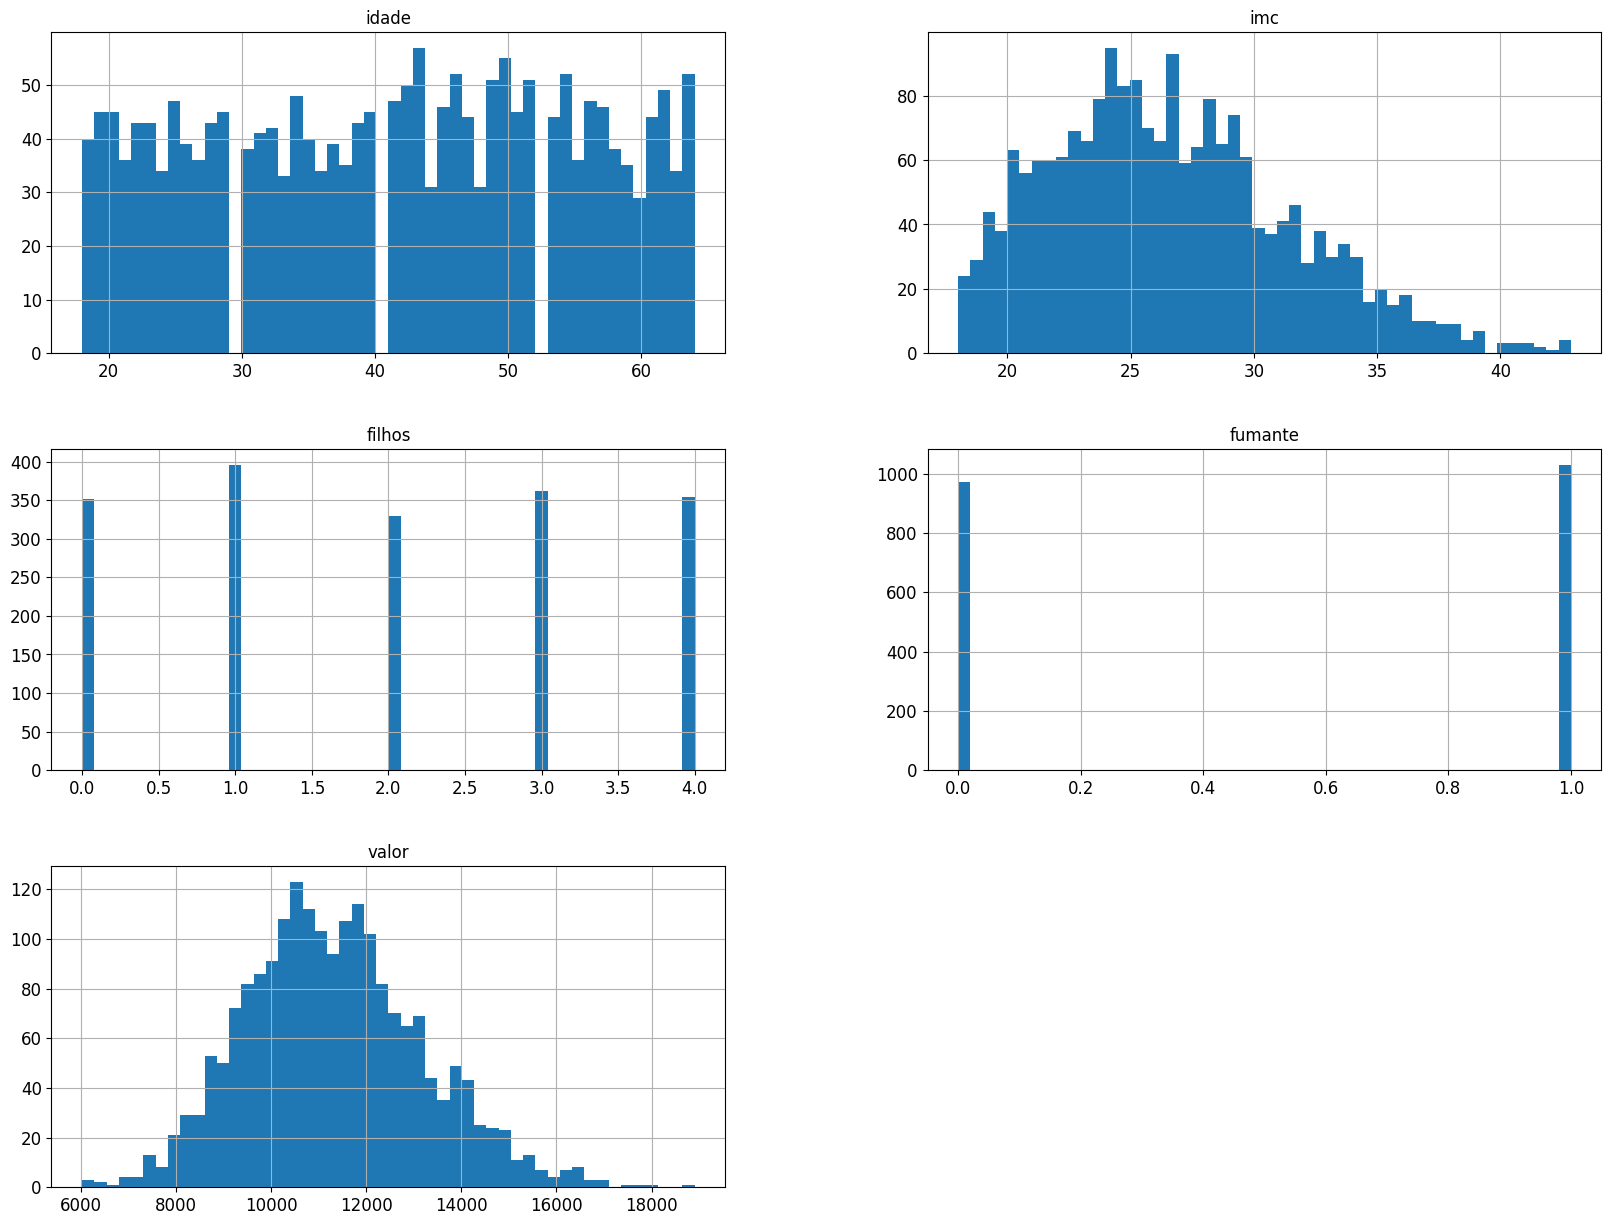

In [311]:
%matplotlib inline
import matplotlib.pyplot as plt
ds.hist(bins=50,figsize=(20,15))


Observações
*   Valor: curva assimétrica, concentrada entre 9k e 14k. O valor está limitado entre 6k e 18k anuais, isso pode limitar a capacidade do modelo.
    








#Pré-processamento de dados

Nesse tópico vamos realizar a limpeza dos dados: criar variageis categoricas, tratar dados nulos e converter dados de texto em numérico.
Também já vamos aproveitar para criar as bases de treinamento e de teste para utilizarmos nos Modelos.


Como o IMC é uma informação importante, vamos trabalhar para categorizá-lo em um formato adequado para modelagem.
Vamos categorizar o IMC seguindo a regra abaixo:
* **1** (Baixo peso) = menos de 18,5;
* **2** (Peso normal) = 18,5 a 24,9;
* **3** (Sobrepeso) = 25 a 29,9;
* **4** (Obesidade) = 30 a 35;
* **5** (Obesidade grave) = 35 ou mais

In [312]:
ds["imc_cat"] =  pd.cut(ds["imc"],
                        bins=[0.,18.5, 24.9,29.9,34.9,100.,np.inf],
                        labels=[1,2,3,4,5,6])

In [313]:
ds["imc_cat"].value_counts()

,count
imc_cat,
2,791
3,725
4,341
5,118
1,25
6,0


In [314]:
ds.loc[ds['imc_cat']==5]

,idade,genero,imc,filhos,fumante,regiao,valor,imc_cat
12,53,Feminino,37.35,4.0,1,Norte,14418.91,5
19,61,Masculino,36.37,3.0,1,Centro-Oeste,14610.94,5
21,55,Masculino,36.09,1.0,0,Sul,12666.11,5
51,64,Masculino,35.96,1.0,0,Norte,13041.94,5
92,62,Feminino,37.28,1.0,1,Sul,13301.20,5
...,...,...,...,...,...,...,...,...
1923,62,Feminino,39.19,NaN,0,Sul,11371.25,5
1953,61,Feminino,35.27,0.0,0,Sul,11842.99,5
1958,53,Feminino,41.06,4.0,0,Sul,13181.18,5
1960,53,Masculino,36.55,2.0,1,Norte,15631.78,5


<Axes: >

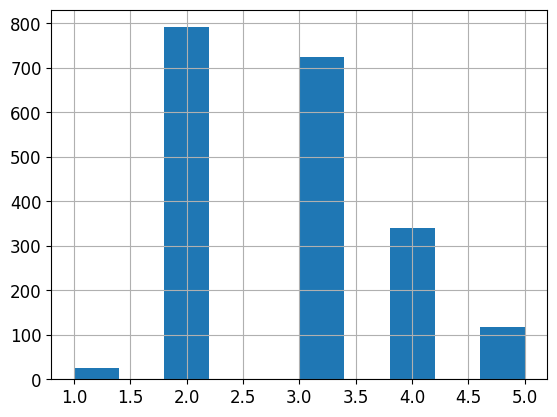

In [315]:
ds["imc_cat"].hist()

Após categorizar o IMC na nova coluna "imc_cat" podemos ver que a classificação está fazendo sentido, pois está mantendo o mesmo padrão da curva apresentada no histograma.

Agora vamos separar a base de treino (df_train) e de teste (df_test)

In [316]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(ds,test_size = 0.2, random_state=7)

In [317]:
print(len(df_train), 'treinamento +', len(df_test), 'teste')

1600 treinamento + 400 teste


Agora vamos trabalhar para que as proporções dos dados estejam bem distribuidas entre base de treino e teste.

In [318]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ds,ds["imc_cat"]):
  strat_train_set = ds.loc[train_index]
  strat_test_set = ds.loc[test_index]

Proporção dos dados da base de teste:

In [319]:
strat_test_set["imc_cat"].value_counts() / len(strat_test_set)

,count
imc_cat,
2,0.3950
3,0.3625
4,0.1700
5,0.0600
1,0.0125
6,0.0000


Proorção dos dados da base de treinamento:

In [320]:
strat_train_set["imc_cat"].value_counts() / len(strat_train_set)

,count
imc_cat,
2,0.395625
3,0.362500
4,0.170625
5,0.058750
1,0.012500
6,0.000000


Nas duas tabelas acima podemos comparar que a proporção dos dados é a mesma entre a base de treino e a base de teste.

Após garantir que os dados estão distribuídos de forma proporcional entre as bases, podemos remover a coluna auxiliar ("imc_cat")

In [321]:
for set_ in (strat_test_set,strat_train_set):
  set_.drop("imc_cat",axis=1,inplace=True)

In [322]:
life_insurance = strat_train_set.copy()

Abaixo um histograma da nossa base de treinamento demonstrando a distribuição entre a "idade" e o "valor":

<Axes: xlabel='idade', ylabel='valor'>

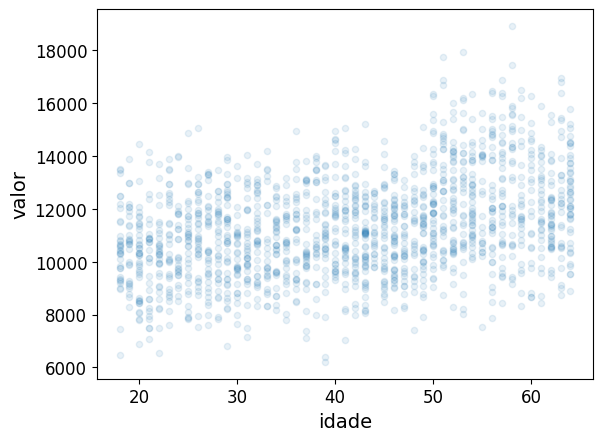

In [323]:
life_insurance.plot(kind='scatter', x='idade', y='valor', alpha=0.1)

Abaixo um histograma da nossa base de treinamento demonstrando a distribuição entre a "idade", "imc" e o "valor":

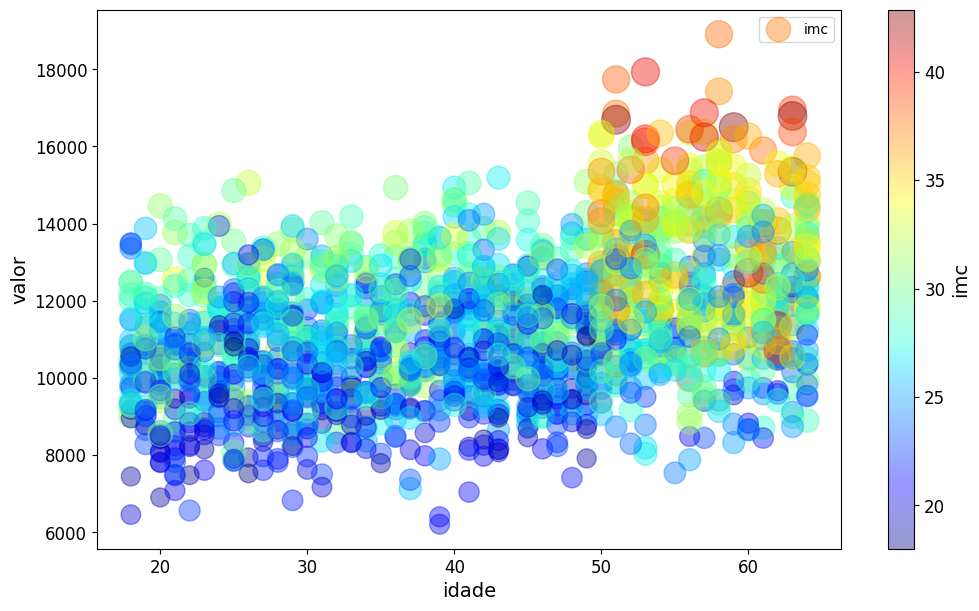

In [324]:
life_insurance.plot(kind='scatter', x='idade', y='valor', alpha=0.4,
                    s=life_insurance["imc"] * 10, label="imc", figsize=(12,7),
                    c="imc", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

Analisando o gráfico, faz sentido o custo (valor) ser maior para pessoas mais velhas (idade) com IMC maior. Repare que a somatória das duas condições (imc e idade) são fatores importantes para a o custo (valor).
Além dessa coreção entre Idade e IMC, podemos notar que ainda existe outro fator, pois existe casos onde o IMC e Idade é moderado, porém o custo é elevado. Provamelmente são casos de fumantes (vamos tratar esses casos nos próximos passos)

Agora vamos analisar a correlação com base no valor do seguro

In [325]:
corr_matriz = life_insurance[['idade','imc','fumante','valor']].corr()

In [326]:
corr_matriz['valor'].sort_values(ascending=False)

,valor
valor,1.000000
imc,0.603714
fumante,0.556860
idade,0.365131


array([[<Axes: xlabel='valor', ylabel='valor'>,
        <Axes: xlabel='idade', ylabel='valor'>,
        <Axes: xlabel='imc', ylabel='valor'>,
        <Axes: xlabel='fumante', ylabel='valor'>],
       [<Axes: xlabel='valor', ylabel='idade'>,
        <Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>,
        <Axes: xlabel='fumante', ylabel='idade'>],
       [<Axes: xlabel='valor', ylabel='imc'>,
        <Axes: xlabel='idade', ylabel='imc'>,
        <Axes: xlabel='imc', ylabel='imc'>,
        <Axes: xlabel='fumante', ylabel='imc'>],
       [<Axes: xlabel='valor', ylabel='fumante'>,
        <Axes: xlabel='idade', ylabel='fumante'>,
        <Axes: xlabel='imc', ylabel='fumante'>,
        <Axes: xlabel='fumante', ylabel='fumante'>]], dtype=object)

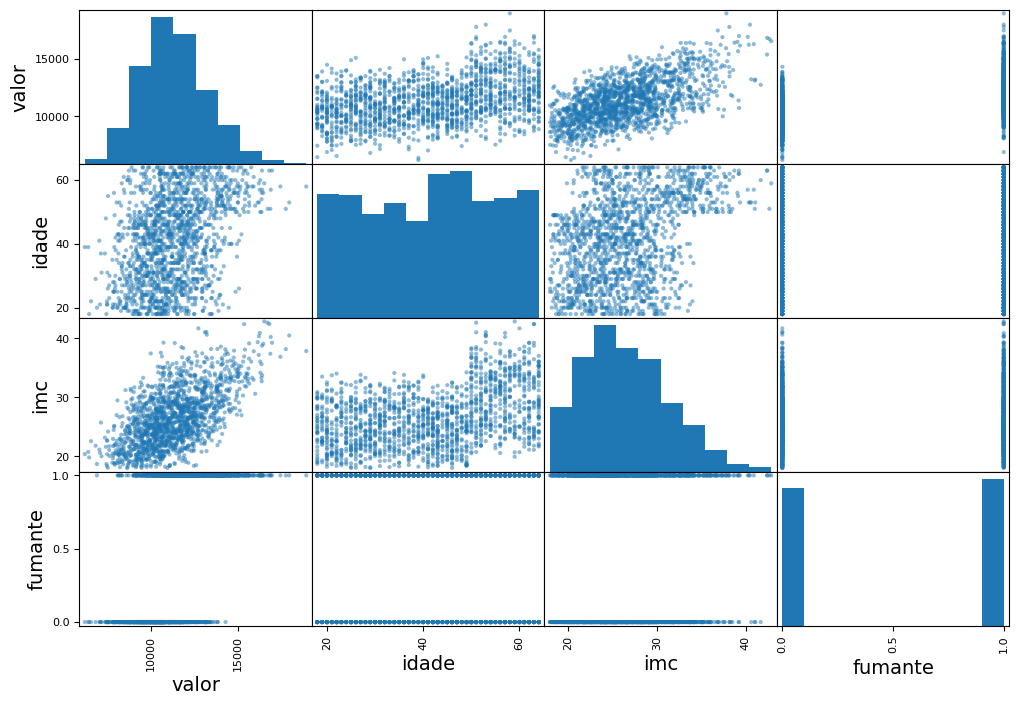

In [327]:
from pandas.plotting import scatter_matrix

attributes = ["valor", "idade", "imc","fumante"]
scatter_matrix(life_insurance[attributes], figsize=(12, 8))

Analisando o grafico podemos ver que há uma forte correlação entre valor x (idade, imc, e fumante). No último por ser um valor binário, a visualmente não forma aquela curva ascendente, entretanto os maiores valores pagos, são por pessoas fumantes.

Removendo nossa variável target para testar o modelo

In [328]:
life_insurance = strat_train_set.drop("valor", axis=1)
life_insurance_labels = strat_train_set["valor"].copy() #armazenando a target (nosso y)

Agora vamos tratar as colunas que estão nulas

In [329]:
sample_incomplete_rows = life_insurance[life_insurance.isnull().any(axis=1)].head()
sample_incomplete_rows

,idade,genero,imc,filhos,fumante,regiao
371,57,Feminino,30.32,NaN,0,Sul
409,50,Masculino,38.33,NaN,0,Sul
190,50,Masculino,24.10,NaN,0,Centro-Oeste
335,47,Feminino,31.54,NaN,0,Sul
1175,27,Feminino,32.85,NaN,1,Sul


In [330]:
life_insurance.isnull().sum()

,0
idade,0
genero,0
imc,0
filhos,162
fumante,0
regiao,0


Criando pipeline para pré-processamento de dados nulos

In [331]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [332]:
life_insurance_num = life_insurance.drop('regiao', axis=1)
life_insurance_num = life_insurance_num.drop('genero', axis=1)

In [333]:
life_insurance_num.head()

,idade,imc,filhos,fumante
585,56,37.42,1.0,0
1922,53,32.50,0.0,1
1428,29,30.84,2.0,0
1412,34,21.94,2.0,1
1643,44,21.03,4.0,0


Agora que as colunas texto foram removidas, vamos tratar os dados nulos

In [334]:
imputer.fit(life_insurance_num)

SimpleImputer(strategy='median')

In [335]:
imputer.statistics_

array([42.  , 26.03,  2.  ,  1.  ])

Aplica o imputer para substituir os valores nulos

In [336]:
X = imputer.transform(life_insurance_num)

In [337]:
X

array([[56.  , 37.42,  1.  ,  0.  ],
       [53.  , 32.5 ,  0.  ,  1.  ],
       [29.  , 30.84,  2.  ,  0.  ],
       ...,
       [37.  , 26.93,  4.  ,  0.  ],
       [52.  , 25.11,  3.  ,  0.  ],
       [42.  , 23.38,  3.  ,  1.  ]])

In [338]:
life_insurance_tr = pd.DataFrame(X, columns=life_insurance_num.columns,
                          index=life_insurance.index)

In [339]:
life_insurance_tr

,idade,imc,filhos,fumante
585,56.0,37.42,1.0,0.0
1922,53.0,32.50,0.0,1.0
1428,29.0,30.84,2.0,0.0
1412,34.0,21.94,2.0,1.0
1643,44.0,21.03,4.0,0.0
...,...,...,...,...
1626,43.0,27.59,2.0,0.0
754,31.0,25.93,4.0,1.0
1712,37.0,26.93,4.0,0.0
555,52.0,25.11,3.0,0.0


Verifica as linhas que foram tratadas pelo pipeline

In [340]:
life_insurance_tr.loc[sample_incomplete_rows.index.values]

,idade,imc,filhos,fumante
371,57.0,30.32,2.0,0.0
409,50.0,38.33,2.0,0.0
190,50.0,24.10,2.0,0.0
335,47.0,31.54,2.0,0.0
1175,27.0,32.85,2.0,1.0


Categorizando colunas em texto - vamos usar o onehotencoder

In [341]:
life_insurance_cat = life_insurance[['genero','regiao']]
life_insurance_cat.head(10)

,genero,regiao
585,Feminino,Sudeste
1922,Feminino,Centro-Oeste
1428,Feminino,Sul
1412,Masculino,Sul
1643,Feminino,Nordeste
510,Masculino,Nordeste
1731,Masculino,Sudeste
1004,Masculino,Sudeste
1703,Feminino,Sudeste
1808,Masculino,Nordeste


In [342]:
try:
    from sklearn.preprocessing import OrdinalEncoder # apenas para gerar um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20




In [343]:
cat_encoder = OneHotEncoder(sparse_output=False)
life_insurance_cat_1hot = cat_encoder.fit_transform(life_insurance_cat)
life_insurance_cat_1hot

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [344]:
cat_encoder.categories_

[array(['Feminino', 'Masculino'], dtype=object),
 array(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
       dtype=object)]

Criando a pipeline de pré-processamento dos dados

Como os valores de cada coluna estão em escalas diferentes, precisamos colocá-los em uma escala mais coesa entre eles

In [345]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #substituindo valores nulos pela mediana
        ('std_scaler', StandardScaler()), # padronizando as escalas dos dados
    ])

life_insurance_num_tr = num_pipeline.fit_transform(life_insurance_num)

In [346]:
life_insurance_num_tr

array([[ 1.08918020e+00,  2.25518143e+00, -7.43830050e-01,
        -1.03175391e+00],
       [ 8.65729970e-01,  1.23183857e+00, -1.48905740e+00,
         9.69223369e-01],
       [-9.21871840e-01,  8.86564351e-01,  1.39730128e-03,
        -1.03175391e+00],
       ...,
       [-3.26004570e-01,  7.32979723e-02,  1.49185200e+00,
        -1.03175391e+00],
       [ 7.91246562e-01, -3.05255687e-01,  7.46624653e-01,
        -1.03175391e+00],
       [ 4.64124741e-02, -6.65089660e-01,  7.46624653e-01,
         9.69223369e-01]])

In [347]:
from sklearn.compose import ColumnTransformer

num_attribs = list(life_insurance_num)
cat_attribs = ['genero','regiao']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #tratando as variáveis numéricas (chamando a pipeline de cima)
        ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
    ])

life_insurance_prepared = full_pipeline.fit_transform(life_insurance)

In [348]:
num_attribs

['idade', 'imc', 'filhos', 'fumante']

In [349]:
life_insurance

,idade,genero,imc,filhos,fumante,regiao
585,56,Feminino,37.42,1.0,0,Sudeste
1922,53,Feminino,32.50,0.0,1,Centro-Oeste
1428,29,Feminino,30.84,2.0,0,Sul
1412,34,Masculino,21.94,2.0,1,Sul
1643,44,Feminino,21.03,4.0,0,Nordeste
...,...,...,...,...,...,...
1626,43,Masculino,27.59,NaN,0,Centro-Oeste
754,31,Masculino,25.93,4.0,1,Sudeste
1712,37,Feminino,26.93,4.0,0,Sul
555,52,Feminino,25.11,3.0,0,Centro-Oeste


In [350]:
life_insurance_prepared.shape

(1600, 11)

Transformando a matriz multidimensional em um dataframe

In [351]:
column_names = ['idade', 'imc', 'filhos','fumante','genero_Feminino'
,'genero_Masculino','regiao_Centro-Oeste', 'regiao_Nordeste', 'regiao_Norte', 'regiao_Sudeste', 'regiao_Sul']

life_insurance_prepared_df = pd.DataFrame(data=life_insurance_prepared,columns=column_names)

life_insurance_prepared_df.head()
# Exibir as primeiras linhas do DataFrame


,idade,imc,filhos,fumante,genero_Feminino,genero_Masculino,regiao_Centro-Oeste,regiao_Nordeste,regiao_Norte,regiao_Sudeste,regiao_Sul
0,1.089180,2.255181,-0.743830,-1.031754,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.865730,1.231839,-1.489057,0.969223,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.921872,0.886564,0.001397,-1.031754,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.549455,-0.964605,0.001397,0.969223,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.195379,-1.153881,1.491852,-1.031754,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Veja que agora a base está tratada e podemos ir para o modelo

In [352]:
print(life_insurance_prepared_df.isnull().sum())

idade                  0
imc                    0
filhos                 0
fumante                0
genero_Feminino        0
genero_Masculino       0
regiao_Centro-Oeste    0
regiao_Nordeste        0
regiao_Norte           0
regiao_Sudeste         0
regiao_Sul             0
dtype: int64


#Modelagem
Nesse tópico vamos explorar alguns modelos preditivos de regressão

Modelo Regressão Linear

In [353]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(life_insurance_prepared, life_insurance_labels)

LinearRegression()

In [354]:
some_data = life_insurance.iloc[:5]
some_labels = life_insurance_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(life_insurance_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [12519.44468647 13577.78251603 10681.15585192 11472.97572435
  8952.73164337]


Comparando o resultado com os valores reais

In [355]:
print("Labels:", list(some_labels))

Labels: [9992.94, 12640.44, 11294.16, 11377.57, 10155.28]


Hora de avaliar o modelo.
MSA

In [356]:
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

life_insurance_predictions = lin_reg.predict(life_insurance_prepared)
lin_mse = mean_squared_error(life_insurance_labels, life_insurance_predictions)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

1022.2961464579673

Vamos comparar com a média do valor pago pelo plano de saude

Valor médio é : 26478.93447
Margem: 1022.29

Considero um valor aceitavel, desvio de em média 67 reais mensais em relaçãoa base.

In [357]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(life_insurance_labels, life_insurance_predictions)
lin_mae

807.6323233525914

Valor médio absoluto (tanto pra mais, quanto pra menos) é de 807 reais

Vamos tentar o r2

In [358]:
from sklearn.metrics import r2_score

In [359]:
r2 = r2_score(life_insurance_labels, life_insurance_predictions)
print('r²',r2)

r² 0.7045027431347395


In [360]:
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [361]:
# Calcular o MAPE
mape_result = calculate_mape(life_insurance_labels, life_insurance_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 7.40%


Modelo Árvore de Decisão

In [362]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(life_insurance_prepared, life_insurance_labels)

DecisionTreeRegressor(max_depth=10)

In [363]:
some_data = life_insurance.iloc[:5]
some_labels = life_insurance_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = model_dtr.predict(some_data_prepared)

print("Predictions:", model_dtr.predict(some_data_prepared))

Predictions: [11059.58733333 12640.44       10675.4490625  10360.59769231
  9940.34714286]


In [364]:
print("Labels:", list(some_labels))

Labels: [9992.94, 12640.44, 11294.16, 11377.57, 10155.28]


In [365]:
life_insurance_predictions = model_dtr.predict(life_insurance_prepared)
lin_mse = mean_squared_error(life_insurance_labels, life_insurance_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

578.6671897134652

In [366]:
# mean_absolute_error
lin_mae = mean_absolute_error(life_insurance_labels, life_insurance_predictions)
lin_mae

385.93029725468006

In [367]:
r2 = r2_score(life_insurance_labels, life_insurance_predictions)
print('r²',r2)

r² 0.9053201146146341


In [368]:
# Calcular o MAPE
mape_result = calculate_mape(life_insurance_labels, life_insurance_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 3.48%


#Validação estatística

###Aplicando técnicas para avaliação de sensibilidade dos modelos

### CURVA ROC AUC:

In [369]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Aqui, usamos a média como exemplo, mas pode ser ajustado conforme o contexto.

Vamos aplicar a classificação binária onde 1 para alto custo, 0 para baixo custo

In [370]:
threshold = life_insurance_labels.mean()
binary_labels = (life_insurance_labels >= threshold).astype(int)

Separando os dados para classificação binária e Treinando um classificador (Logistic Regression, por exemplo)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(life_insurance_prepared, binary_labels, test_size=0.2, random_state=7)
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

Previsões de probabilidade para a classe "alto custo"

In [372]:
y_prob = clf.predict_proba(X_test)[:, 1]



Calculando a curva ROC e a AUC

In [373]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

Curva ROC

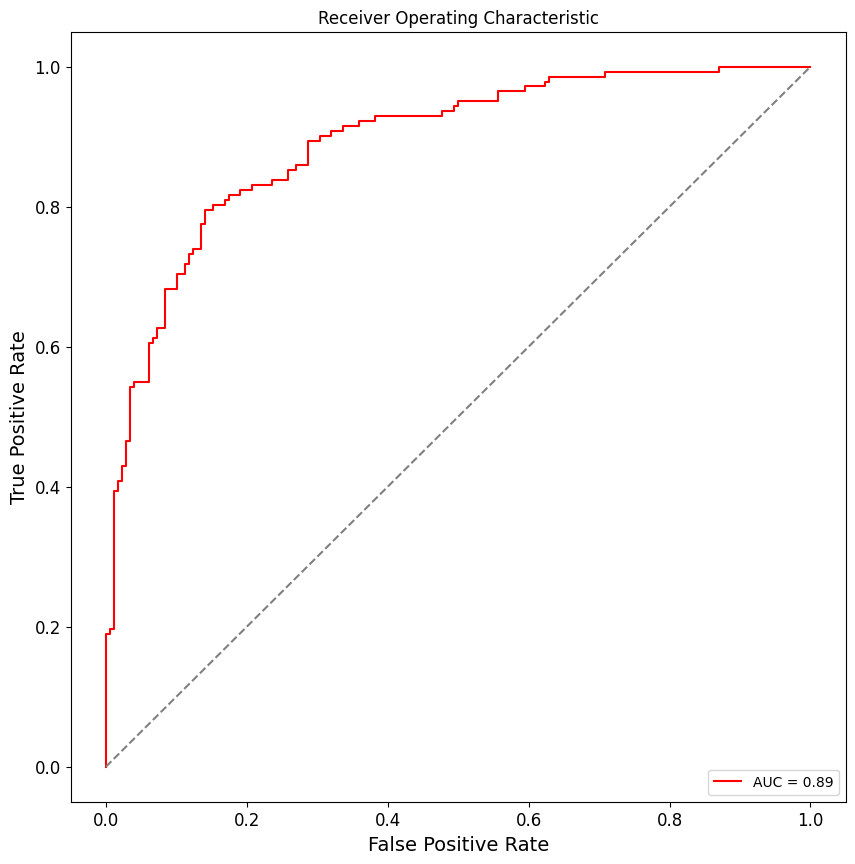

A AUC da curva ROC é: 0.89


In [374]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print(f"A AUC da curva ROC é: {roc_auc:.2f}")

Com base nas aulas e demonstrações dos professores, analisando a curva com os resultado em (0.89), fica evidenciado que o modelo não está enviesado, garantindo, por meio da visualização, que não houve overfitting nem underfitting.

## Resumo
Dada a necessidade de prever encargos com valores contínuos, optamos inicialmente pela árvore de decisão como o modelo de regressão mais adequado. A análise das métricas de avaliação, incluindo a curva ROC e a área sob a curva (AUC), indicou que nosso modelo não apresenta enviesamento significativo, corroborando a escolha do algoritmo. Além disso, experimentamos uma abordagem de classificação binária, segmentando os custos como "altos" e "baixos" com base na média do erro quadrático médio (MSE) e aplicando validação cruzada. Contudo, concluímos que a regressão com árvore de decisão é mais adequada ao objetivo principal de estimar encargos contínuos.